### Testing implementation of linear regression from scratch

In [1]:
import sys,os 
sys.path.insert(0, os.path.abspath("../.."))
print(sys.path[0])

/Users/akashanand/ML_from_Scratch


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from models.linear_regression import LinearRegression
from core.metrics import mean_squared_error, r2_score, root_mean_squared_error, r2_adjusted
from sklearn.datasets import make_regression
import time

##### Synthetic Data
Here we will create a smaller synthetic dataset using sklearn

In [3]:
X, y = make_regression(n_samples=100, n_features=5, noise=10, random_state=42)#making our synthetic data

In [4]:
lr_norm=LinearRegression('norm')
lr_gr=LinearRegression('gr')

In [5]:
# --- Normal Equation ---
start = time.time()
lr_norm.fit(X, y)
end = time.time()
print("Normal Equation Time:", end - start, "seconds")

# --- Gradient Descent ---
start = time.time()
lr_gr.fit(X, y)
end = time.time()
print("Gradient Descent Time:", end - start, "seconds")

Normal Equation Time: 0.009776115417480469 seconds
Gradient Descent Time: 0.017650127410888672 seconds


The normal equation runs faster for a smaller dataset.

In [6]:
y_pred_norm=lr_norm.predict(X)
y_pred_gr=lr_gr.predict(X)

In [7]:
print(mean_squared_error(y,y_pred_norm))
print(mean_squared_error(y,y_pred_gr))

86.8265798621938
86.82657988320646


In [8]:
print(r2_score(y,y_pred_norm))
print(r2_score(y,y_pred_gr))

0.9955395169111729
0.9955395169100935


In [9]:
print(root_mean_squared_error(y,y_pred_norm))
print(root_mean_squared_error(y,y_pred_gr))

9.318078120631625
9.318078121759147


In [10]:
print(r2_adjusted(y,y_pred_norm,X))
print(r2_adjusted(y,y_pred_gr,X))

0.9953022571724055
0.9953022571712686


Looking at these metrics, we can see that the normal equation has better accuracy but the difference is minimal.

### Testing on a Real Dataset

In [11]:
df=pd.read_csv('Student_Performance.csv')

In [ ]:
df.shape#10000 entries, 6 features

(10000, 6)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [18]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [ ]:
print(df.isnull().sum())#no null values

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


In [ ]:
df.duplicated().sum()#127/10000 is not much, will leave duplicates in the model

127

In [31]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


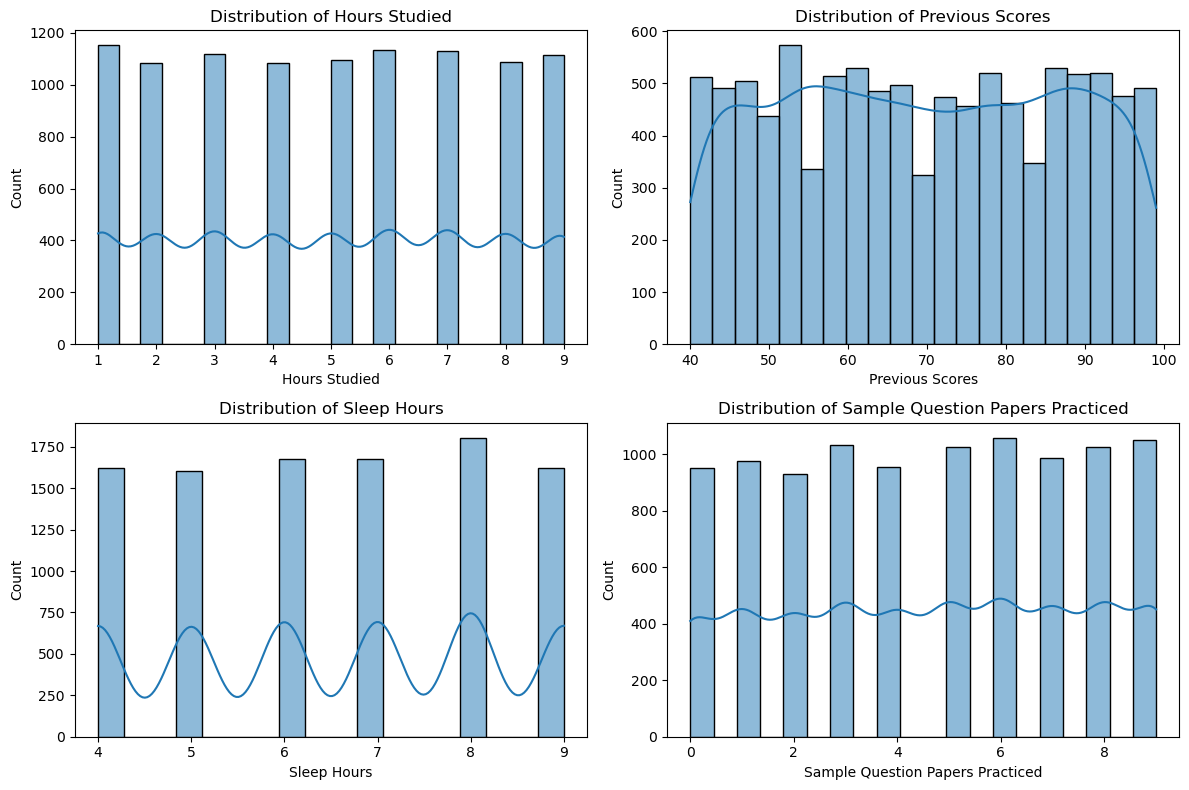

In [29]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))#Making a 2x2 grid
cols = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']#cols we need to see dist of
axes = axes.flatten()
for i, col in enumerate(cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

Distributions are not normal so I will attempt to standardize later.

In [34]:
df['Extracurricular Activities']=df['Extracurricular Activities'].map({'Yes':1,'No':0})

<Axes: >

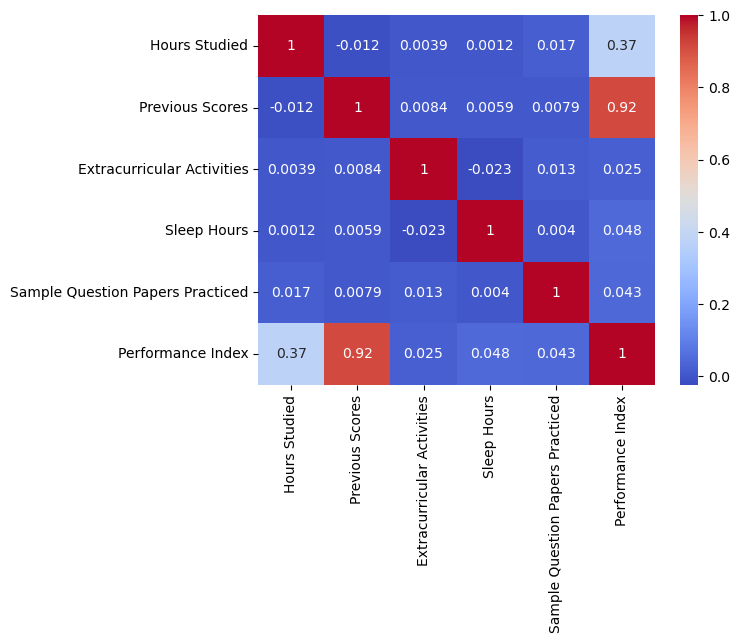

In [35]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

<Axes: xlabel='Sleep Hours', ylabel='Performance Index'>

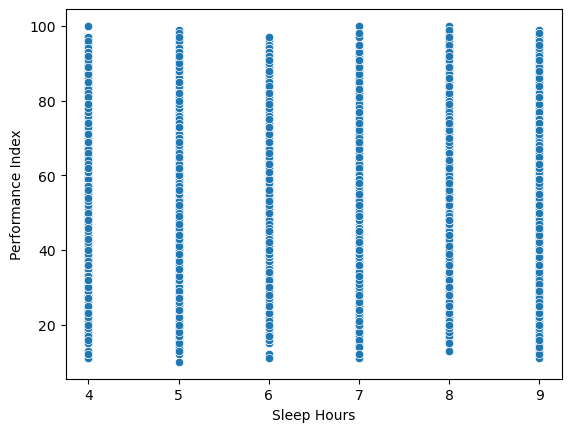

In [ ]:
sns.scatterplot(x='Sleep Hours', y='Performance Index', data=df)#Correlation is low because of lack of variation in most

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='Performance Index'), df['Performance Index'], test_size=0.2, random_state=42)

In [40]:
lr_gr=LinearRegression()
lr_norm=LinearRegression()

Scaling the data using z-score

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

[[ 0.00645547 -1.18384439 -0.98930717  0.26988848  0.13404112]
 [-1.14974745 -1.24150571  1.01080841  0.26988848  0.48356164]
 [-1.14974745  0.66131759 -0.98930717  0.26988848 -0.91452044]
 ...
 [ 1.54805935 -1.24150571 -0.98930717  0.26988848  0.48356164]
 [-1.53514842 -1.29916702 -0.98930717  1.4474766  -1.61356148]
 [-1.14974745 -1.35682833 -0.98930717 -0.31890558  0.48356164]]


In [53]:
# --- Normal Equation ---
start = time.time()
lr_norm.fit(X_train_scaled, y_train)
end = time.time()
print("Normal Equation Time:", end - start, "seconds")

# --- Gradient Descent ---
start = time.time()
lr_gr.fit(X_train_scaled, y_train)
end = time.time()
print("Gradient Descent Time:", end - start, "seconds")

Normal Equation Time: 0.3823409080505371 seconds
Gradient Descent Time: 0.2803359031677246 seconds


Now we can clearly see that Gradient Descent is faster

In [54]:
y_pred_norm=lr_norm.predict(X_test_scaled)
y_pred_gr=lr_gr.predict(X_test_scaled)

In [55]:
print(mean_squared_error(y_test,y_pred_norm))
print(mean_squared_error(y_test,y_pred_gr))

4.0826283917664785
4.0826283917664785


In [57]:
print(r2_score(y_test,y_pred_norm))
print(r2_score(y_test,y_pred_gr))

0.9889832909755435
0.9889832909755435


In [60]:
print(root_mean_squared_error(y_test,y_pred_norm))
print(root_mean_squared_error(y_test,y_pred_gr))


2.0205515068333395
2.0205515068333395


In [61]:
print(r2_adjusted(y_test,y_pred_norm,X_test))
print(r2_adjusted(y_test,y_pred_gr,X_test))

0.9889556663290429
0.9889556663290429


Hence, we can see that gradient descent gets marginally faster as the dataset size increases.